#### 본 파일은 2022_1_Data Science and Reinforcement Learning 최종과제 1차 제출을 위한 description 파일입니다.   
#### agent 재훈련을 위한 코드가 수록되어있으며, 자세한 실행 방법은 주석과 markdown으로 작성하였습니다. 

In [1]:
import numpy as np
import gym
import random
from lava_grid import ZigZag6x10
from tqdm import tqdm
import math
from agent_lava import agent
import matplotlib.pyplot as plt

# 1. Performance

### seed setting

In [2]:
np.random.seed(None)
random.seed(None)

### defult environment setting

In [3]:
# default setting
max_steps = 100
stochasticity = 0 # probability of the selected action failing and instead executing any of the remaining 3
no_render = True

env = ZigZag6x10(max_steps=max_steps, act_fail_prob=stochasticity, goal=(5, 9), numpy_state=False)
s = env.reset()
done = False
cum_reward = 0.0

### build agent
* Code has been written to automatically set the initial value(Q table) when the agent is created.  
* 에이전트가 생성될 때 초깃값(Q table)이 자동으로 설정되도록 코드를 작성하였습니다.

In [4]:
""" Your agent"""
my_agent = agent()

100%|█████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 466.37it/s]


### test 1 episode

In [5]:
# moving costs -0.01, falling in lava -1, reaching goal +1
# final reward is number_of_steps / max_steps
while not done:
    action = my_agent.action(s)
    # action = random.randrange(4): random actions
    ns, reward, done, _ = env.step(action)
    cum_reward += reward
    s = ns
print(f"total reward: {cum_reward}")

total reward: 0.8099999999999999


#### test n episode

In [6]:
n = 50
record = []
for i in range(n):
    while not done:
        action = my_agent.action(s)
        # action = random.randrange(4): random actions
        ns, reward, done, _ = env.step(action)
        cum_reward += reward
        s = ns
#     print(f"total reward: {cum_reward}")
    record.append(cum_reward)

#### result 

In [7]:
# print record count
record_count = {}
for i in record:
    if i in record_count:
        record_count[i] +=1
        
    else:
        record_count[i] = 1
print(record_count)

{0.8099999999999999: 50}


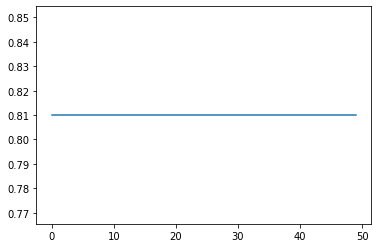

In [8]:
# plotting result
plt.plot(record)
plt.show()

# 2. Sample Efficiency

### seed setting

In [9]:
np.random.seed(None)
random.seed(None)

### build agent & reset Q table

In [10]:
""" Your agent"""
my_agent = agent(set_parameter=False)
my_agent.reset_q_table()

In [11]:
# check initialized Q table
initialized_q_table = my_agent.q_table

for i in initialized_q_table:
    print(f"Q table of {i} state : {initialized_q_table[i]}")

Q table of 0 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 1 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 2 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 3 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 4 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 5 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 6 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 7 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 8 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 9 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 10 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 11 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 12 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 13 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 14 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 15 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 16 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 17 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 18 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 19 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 20 state : {0: 0, 1: 0, 2: 0, 3: 0}
Q table of 21 state : {

### train episode

In [12]:
# number of episode
num_episode = 3000
# record reward of each episode
record = my_agent.activate_learn(num_episode) 


100%|█████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 436.49it/s]


### result(AUC)

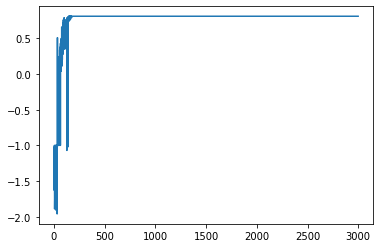

In [13]:
# plotting episodic return
# total 3000 episode
plt.plot(record[:])
plt.show()

### sklearn AUC metric

In [14]:
from sklearn import metrics

metrics.auc([i for i in range(len(record))], record)

2298.0199999999995

# 3. References

[1] Watkins, Christopher J. C. H., and Peter Dayan. “Q-Learning - Machine Learning.” SpringerLink. Kluwer Academic Publishers. Accessed June 8, 2022. https://link.springer.com/article/10.1007/BF00992698.   

[2] Michaeltinsley. “Michaeltinsley/Gridworld-with-Q-Learning-Reinforcement-Learning-.” GitHub. Accessed June 8, 2022. https://github.com/michaeltinsley/Gridworld-with-Q-Learning-Reinforcement-Learning-. 